# Ukraine Data Explorer

Source: [Humanitarian Data Exchange](https://data.humdata.org/visualization/ukraine-humanitarian-operations/)

In [54]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [55]:
import pandas as pd
import geopandas as gpd

In [56]:
import altair as alt
import urllib.request, json

In [57]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

---

## Parse data feed

In [58]:
all_url = (
    "https://raw.githubusercontent.com/OCHA-DAP/hdx-scraper-ukraine-viz/main/all.json"
)

#### Read data

In [59]:
import urllib.request, json

with urllib.request.urlopen(all_url) as url:
    data = json.loads(url.read().decode())
    print(data.keys())

dict_keys(['refugees_series_data', 'idps_macro_data', 'fatalities_data', 'regional_data', 'national_data', 'subnational_data', 'sources_data'])


#### Loop and create a list of dataframes

In [7]:
dataframes = []

for d in data.keys():
    dataframes.append(pd.DataFrame(data[d]))

#### Create dataframes for each data source

In [8]:
refugees_series_data = dataframes[0]
idps_macro_data = dataframes[1]
fatalities_data = dataframes[2]
national_data = dataframes[3]
subnational_data = dataframes[4]
sources_data = dataframes[5]

#### Clean up the column names

In [9]:
refugees_series_data.columns = refugees_series_data.columns.str.replace(
    "#", "", regex=False
).str.replace("+", "_", regex=False)
idps_macro_data.columns = idps_macro_data.columns.str.replace(
    "#", "", regex=False
).str.replace("+", "_", regex=False)
fatalities_data.columns = fatalities_data.columns.str.replace(
    "#", "", regex=False
).str.replace("+", "_", regex=False)
national_data.columns = national_data.columns.str.replace(
    "#", "", regex=False
).str.replace("+", "_", regex=False)
subnational_data.columns = subnational_data.columns.str.replace(
    "#", "", regex=False
).str.replace("+", "_", regex=False)
sources_data.columns = sources_data.columns.str.replace(
    "#", "", regex=False
).str.replace("+", "_", regex=False)

---

#### Refugees timeseries

In [10]:
refugees_series_data.head()

,affected_date_refugees,affected_refugees
0,2022-02-24,84681
1,2022-02-25,108301
2,2022-02-26,148319
3,2022-02-27,168364
4,2022-02-28,162474


#### Data types

In [11]:
refugees_series_data["date"] = pd.to_datetime(
    refugees_series_data["affected_date_refugees"]
)

In [12]:
refugees_series_data["affected_refugees"] = refugees_series_data[
    "affected_refugees"
].astype(int)

In [13]:
refugees_series_data["cumsum"] = refugees_series_data["affected_refugees"].cumsum()

In [14]:
alt.Chart(refugees_series_data).mark_line().encode(x="date", y="affected_refugees")

alt.Chart(...)

---

In [48]:
print(refugees_series_data["cumsum"])

0       84681
1      192982
2      341301
3      509665
4      672139
5      838829
6     1033312
7     1201217
8     1373316
9     1570836
10    1779996
11    1987656
12    2172694
13    2343537
14    2479192
15    2597460
16    2713282
17    2838599
18    2952275
19    3063095
20    3169897
21    3264054
22    3346709
23    3423466
24    3489644
Name: cumsum, dtype: int64


#### IDPS macro data feed

In [15]:
idps_macro_data.head()

,region_macro_name,affected_idps
0,KYIV,182672
1,EAST,1123237
2,SOUTH,417813
3,CENTER,1123237
4,NORTH,1044857


---

#### Fatality incidents

In [16]:
fatalities_data.head()

,date_occurred,event_type,event_type_sub,group_name_first,group_name_second,adm1_name,adm2_name,adm3_name,loc_name,geo_lat,geo_lon,description,affected_killed
0,2022-03-11,Battles,Armed clash,Military Forces of Russia (2000-),Military Forces of Ukraine (2019-),Chernihiv,Chernihivskyi,Chepnigivska,Chernihiv,51.5055,31.2849,"On 11 March 2022, fighting took place between ...",10
1,2022-03-11,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),Military Forces of Russia (2000-) Air Force,Chernihiv,Chernihivskyi,Chepnigivska,Chernihiv,51.5055,31.2849,"On 11 March 2022, Ukrainian forces shot down t...",0
2,2022-03-11,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,Donetsk,Kramatorskyi,Limanska,Rubtsi,49.1772,37.5666,"On 11 March 2022, Russian forces shelled Rubts...",0
3,2022-03-11,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,Donetsk,Kramatorskyi,Limanska,Yatskivka,49.1716,37.5477,"On 11 March 2022, Russian forces shelled Yatsk...",0
4,2022-03-11,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,Donetsk,Mariupolskyi,Mariupolska,Mariupol,47.1298,37.5710,"On 11 March 2022, Russian forces shelled Mariu...",0


#### Data types

In [17]:
fatalities_data["date_occurred"] = pd.to_datetime(fatalities_data["date_occurred"])
fatalities_data["affected_killed"] = fatalities_data["affected_killed"].astype(int)

#### Group by event types and total fatalities

In [18]:
fatalities_grouped = (
    fatalities_data.groupby(["date_occurred", "event_type", "event_type_sub"])
    .agg({"affected_killed": sum})
    .reset_index()
)

In [19]:
fatalities_grouped.head()

,date_occurred,event_type,event_type_sub,affected_killed
0,2022-02-24,Battles,Armed clash,51
1,2022-02-24,Battles,Non-state actor overtakes territory,0
2,2022-02-24,Explosions/Remote violence,Air/drone strike,0
3,2022-02-24,Explosions/Remote violence,Remote explosive/landmine/IED,0
4,2022-02-24,Explosions/Remote violence,Shelling/artillery/missile attack,19


In [20]:
fatalities_grouped.tail()

,date_occurred,event_type,event_type_sub,affected_killed
92,2022-03-11,Explosions/Remote violence,Air/drone strike,7
93,2022-03-11,Explosions/Remote violence,Remote explosive/landmine/IED,0
94,2022-03-11,Explosions/Remote violence,Shelling/artillery/missile attack,20
95,2022-03-11,Violence against civilians,Abduction/forced disappearance,0
96,2022-03-11,Violence against civilians,Attack,0


#### Fatalities by type

In [21]:
fatalities_events_grouped = (
    fatalities_data.groupby(["date_occurred", "event_type"])
    .agg({"affected_killed": sum})
    .reset_index()
)

In [22]:
fatalities_events_pivot = (
    fatalities_events_grouped.pivot_table(
        columns="event_type", values="affected_killed", index="date_occurred"
    )
    .reset_index()
    .fillna(0)
)

In [23]:
fatalities_events_pivot

event_type,date_occurred,Battles,Explosions/Remote violence,Riots,Violence against civilians
0,2022-02-24,51.0,19.0,0.0,8.0
1,2022-02-25,19.0,13.0,0.0,3.0
2,2022-02-26,53.0,25.0,0.0,5.0
3,2022-02-27,30.0,13.0,0.0,16.0
4,2022-02-28,14.0,91.0,0.0,10.0
5,2022-03-01,12.0,67.0,0.0,5.0
6,2022-03-02,235.0,29.0,0.0,3.0
7,2022-03-03,53.0,68.0,0.0,3.0
8,2022-03-04,28.0,44.0,0.0,4.0
9,2022-03-05,82.0,27.0,0.0,5.0


#### Fatalities by more specific subtype

In [24]:
fatalities_subevents_grouped = (
    fatalities_data.groupby(["date_occurred", "event_type_sub"])
    .agg({"affected_killed": sum})
    .reset_index()
)

In [25]:
fatalities_subevents_pivot = (
    fatalities_subevents_grouped.pivot_table(
        columns="event_type_sub", values="affected_killed", index="date_occurred"
    )
    .reset_index()
    .fillna(0)
)

In [26]:
fatalities_subevents_pivot

event_type_sub,date_occurred,Abduction/forced disappearance,Air/drone strike,Armed clash,Attack,Government regains territory,Mob violence,Non-state actor overtakes territory,Remote explosive/landmine/IED,Shelling/artillery/missile attack
0,2022-02-24,0.0,0.0,51.0,8.0,0.0,0.0,0.0,0.0,19.0
1,2022-02-25,0.0,4.0,19.0,3.0,0.0,0.0,0.0,1.0,8.0
2,2022-02-26,0.0,0.0,53.0,5.0,0.0,0.0,0.0,0.0,25.0
3,2022-02-27,0.0,0.0,30.0,16.0,0.0,0.0,0.0,0.0,13.0
4,2022-02-28,0.0,0.0,13.0,10.0,0.0,0.0,1.0,1.0,90.0
5,2022-03-01,0.0,16.0,12.0,5.0,0.0,0.0,0.0,0.0,51.0
6,2022-03-02,0.0,18.0,235.0,3.0,0.0,0.0,0.0,0.0,11.0
7,2022-03-03,0.0,53.0,50.0,3.0,0.0,0.0,3.0,0.0,15.0
8,2022-03-04,0.0,34.0,28.0,4.0,0.0,0.0,0.0,0.0,10.0
9,2022-03-05,0.0,17.0,82.0,5.0,0.0,0.0,0.0,0.0,10.0


#### Fatalities over time

In [27]:
fatalities_timeseries = (
    fatalities_data.groupby(["date_occurred"])
    .agg({"affected_killed": sum})
    .reset_index()
)

In [28]:
fatalities_timeseries["cumsum"] = fatalities_timeseries["affected_killed"].cumsum()

In [29]:
fatalities_timeseries

,date_occurred,affected_killed,cumsum
0,2022-02-24,78,78
1,2022-02-25,35,113
2,2022-02-26,83,196
3,2022-02-27,59,255
4,2022-02-28,115,370
5,2022-03-01,84,454
6,2022-03-02,267,721
7,2022-03-03,124,845
8,2022-03-04,76,921
9,2022-03-05,114,1035


### Group events by region

In [95]:
# this will give us events by location
fatalities_byregion = (
    fatalities_data.groupby(["adm1_name"]).agg({"affected_killed": sum}).reset_index()
)

In [96]:
fatalities_byregion

,adm1_name,affected_killed
0,Black Sea,0
1,Cherkasy,1
2,Chernihiv,349
3,Crimea,0
4,Dnipropetrovsk,1
5,Donetsk,91
6,Ivano-Frankivsk,0
7,Kharkiv,278
8,Kherson,69
9,Khmelnytskyi,2


In [99]:
fatalities_byregion["oblast"] = fatalities_byregion["adm1_name"].astype(str) + " Oblast"

In [100]:
fatalities_byregion.head()

,adm1_name,affected_killed,oblast
0,Black Sea,0,Black Sea Oblast
1,Cherkasy,1,Cherkasy Oblast
2,Chernihiv,349,Chernihiv Oblast
3,Crimea,0,Crimea Oblast
4,Dnipropetrovsk,1,Dnipropetrovsk Oblast


In [102]:
sum(fatalities_byregion.affected_killed)

1616

In [103]:
sum(fatalities_events_pivot["Violence against civilians"])

91.0

In [64]:
fatalites_byregion_date = (
    fatalities_data.groupby(["date_occurred", "adm1_name"])
    .agg({"affected_killed": sum})
    .reset_index()
)

In [67]:
fatalites_byregion_date

,date_occurred,adm1_name,affected_killed
0,2022-02-24,Cherkasy,1
1,2022-02-24,Crimea,0
2,2022-02-24,Donetsk,6
3,2022-02-24,Ivano-Frankivsk,0
4,2022-02-24,Kharkiv,2
5,2022-02-24,Kherson,6
6,2022-02-24,Kyiv,8
7,2022-02-24,Kyiv City,5
8,2022-02-24,Luhansk,50
9,2022-02-24,Lviv,0


In [70]:
fatalities_region_dates_pivot = (
    fatalites_byregion_date.pivot_table(
        columns="date_occurred", values="affected_killed", index="adm1_name"
    )
    .reset_index()
    .fillna(0)
)

---

In [71]:
fatalities_region_dates_pivot

date_occurred,adm1_name,2022-02-24 00:00:00,2022-02-25 00:00:00,2022-02-26 00:00:00,2022-02-27 00:00:00,2022-02-28 00:00:00,2022-03-01 00:00:00,2022-03-02 00:00:00,2022-03-03 00:00:00,2022-03-04 00:00:00,2022-03-05 00:00:00,2022-03-06 00:00:00,2022-03-07 00:00:00,2022-03-08 00:00:00,2022-03-09 00:00:00,2022-03-10 00:00:00,2022-03-11 00:00:00
0,Black Sea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cherkasy,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Chernihiv,0.0,0.0,0.0,12.0,1.0,0.0,202.0,57.0,34.0,1.0,10.0,0.0,3.0,14.0,3.0,12.0
3,Crimea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Dnipropetrovsk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,Donetsk,6.0,3.0,19.0,0.0,2.0,2.0,14.0,0.0,0.0,0.0,35.0,0.0,1.0,8.0,1.0,0.0
6,Ivano-Frankivsk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Kharkiv,2.0,2.0,5.0,11.0,15.0,20.0,23.0,16.0,5.0,4.0,23.0,22.0,96.0,6.0,11.0,17.0
8,Kherson,6.0,1.0,10.0,9.0,0.0,21.0,19.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
9,Khmelnytskyi,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Civilian fatalities

In [30]:
subnational_data[["affected_idps", "affected_killed", "affected_injured"]] = (
    subnational_data[["affected_idps", "affected_killed", "affected_injured"]]
    .fillna(0)
    .astype(int)
)

In [31]:
subnational_data

,country_code,country_name,population,affected_idps,affected_killed,affected_injured,inneed_ind,value_funding_other_plan_name,value_funding_other_required_usd,value_funding_other_total_usd,value_funding_other_pct,value_funding_uhf_usd,value_cerf_funding_total_usd,affected_refugees,affected_date_refugees
0,UKR,Ukraine,44134693,6477723,925,1496,12000000,Ukraine Flash Appeal 2022,1139900000,427697127,0.3752,72470185,60503889.0,NaN,NaN
1,POL,Poland,37950802,0,0,0,NaN,Ukraine Regional Refugee Response Plan 2022,NaN,47900000,NaN,NaN,NaN,2083854,2022-03-20
2,HUN,Hungary,9749763,0,0,0,NaN,Ukraine Regional Refugee Response Plan 2022,NaN,9300000,NaN,NaN,NaN,312120,2022-03-20
3,SVK,Slovakia,5458827,0,0,0,NaN,Ukraine Regional Refugee Response Plan 2022,NaN,3800000,NaN,NaN,NaN,250036,2022-03-20
4,ROU,Romania,19286123,0,0,0,NaN,Ukraine Regional Refugee Response Plan 2022,NaN,10300000,NaN,NaN,NaN,242908,2022-03-20
5,MDA,Republic of Moldova,2620495,0,0,0,NaN,Ukraine Regional Refugee Response Plan 2022,NaN,21570877,NaN,NaN,NaN,365197,2022-03-20
6,BLR,Belarus,9379952,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3765,2022-03-20
7,RUS,Russian Federation,144104080,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231764,2022-03-20


In [61]:
casualties = 925 + 1496

In [32]:
killed = subnational_data[subnational_data["country_name"] == "Ukraine"][
    "affected_killed"
][0]
injured = subnational_data[subnational_data["country_name"] == "Ukraine"][
    "affected_injured"
][0]

In [60]:
injured

1496

In [34]:
killed

925

In [62]:
casualties

2421

---

#### Population data 

In [35]:
sources_data.head()

,country_code,country_name,adm1_code,adm1_name,population,loc_count_health
0,UKR,Ukraine,UA01,Avtonomna Respublika Krym,1941905,144
1,UKR,Ukraine,UA71,Cherkaska,1188508,48
2,UKR,Ukraine,UA74,Chernihivska,982752,35
3,UKR,Ukraine,UA73,Chernivetska,898567,43
4,UKR,Ukraine,UA12,Dnipropetrovska,3173339,86


---

## Geography

#### Make the fatalities data a geodataframe

In [36]:
fatalities_data.head(1)

,date_occurred,event_type,event_type_sub,group_name_first,group_name_second,adm1_name,adm2_name,adm3_name,loc_name,geo_lat,geo_lon,description,affected_killed
0,2022-03-11,Battles,Armed clash,Military Forces of Russia (2000-),Military Forces of Ukraine (2019-),Chernihiv,Chernihivskyi,Chepnigivska,Chernihiv,51.5055,31.2849,"On 11 March 2022, fighting took place between ...",10


#### Convert lon/lat

In [37]:
fatalities_data_gdf = gpd.GeoDataFrame(
    fatalities_data,
    geometry=gpd.points_from_xy(fatalities_data.geo_lon, fatalities_data.geo_lat),
)

<AxesSubplot:>

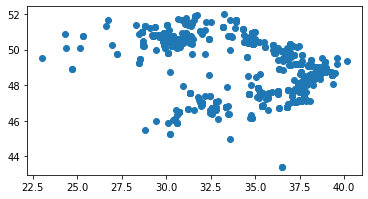

In [38]:
fatalities_data_gdf.plot()

In [39]:
border_crossings = gpd.read_file(
    "https://raw.githubusercontent.com/OCHA-DAP/hdx-scraper-ukraine-viz/main/UKR_Border_Crossings.geojson"
)

<AxesSubplot:>

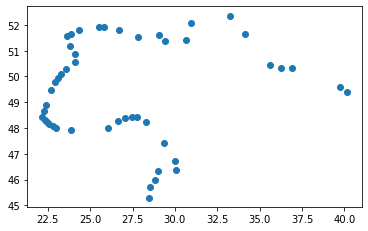

In [40]:
border_crossings.plot()

---

#### Exports

In [41]:
refugees_series_data.to_csv(
    "data/processed/tracker_refugees_series_data.csv", index=False
)

In [42]:
fatalities_timeseries.to_csv(
    "data/processed/tracker_fatalities_timeseries.csv", index=False
)

In [43]:
fatalities_events_pivot.to_csv(
    "data/processed/tracker_incidents_fatalities_types.csv", index=False
)

In [44]:
fatalities_subevents_pivot.to_csv(
    "data/processed/tracker_subtype_incidents_fatalities_types.csv", index=False
)

In [45]:
fatalities_data_gdf.to_file(
    "data/processed/tracker_fatalities_locations.geojson", driver="GeoJSON"
)

In [83]:
most_violence_byregion.to_csv("data/processed/events_byregion.csv", index=False)

In [101]:
fatalities_byregion.to_csv("data/processed/deaths_byregion.csv", index=False)

### Add covid data

In [85]:
# I added it and it crashed everything bc maybe it was too big of a dataset?
cases_raw = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
)

In [88]:
ukraine_cases = cases_raw[cases_raw['Country/Region'=="Ukraine"]]

KeyError: False

In [122]:
# why didn't renaming columns work...
cases_raw.rename(
    columns={
        "Province/State": "province_state",
        "Country/Region": "country_region",
        "Lat": "lat",
        "Long": "long",
    },
    inplace=True,
)
cases_raw.head()

,province_state,country_region,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/

In [126]:
cases_raw.columns([0:4])

SyntaxError: invalid syntax (2031687263.py, line 1)

ERROR:root:Cannot parse: 1:20: cases_raw.columns([0:4])
Traceback (most recent call last):
  File "/Users/alexleedsmatthews/opt/anaconda3/lib/python3.9/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/Users/alexleedsmatthews/opt/anaconda3/lib/python3.9/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "/Users/alexleedsmatthews/opt/anaconda3/lib/python3.9/site-packages/black.py", line 725, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "/Users/alexleedsmatthews/opt/anaconda3/lib/python3.9/site-packages/black.py", line 836, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 1:20: cases_raw.columns([0:4])


In [109]:
# getting geo data for idps
idp_file = gpd.read_file(
    "https://data.humdata.org/visualization/ukraine-humanitarian-operations/data/macro-region.geojson"
)

In [110]:
idp_file["validOn"] = pd.to_datetime(idp_file["validOn"])
idp_file["date"] = pd.to_datetime(idp_file["date"])

In [121]:
idp_file[idp_file["validOn"] == idp_file["validOn"].max()]

,OBJECTID,admin1Name_en,admin1Name_ua,admin1Name_ru,admin1Pcode,admin1RefName,admin1AltName1_en,admin1AltName2_en,admin1AltName1_ua,admin1AltName2_ua,admin1AltName1_ru,admin1AltName2_ru,admin0Name_en,admin0Name_ua,admin0Name_ru,admin0Pcode,date,validOn,validTo,macroRegion,idpPresence,geometry
0,1,Avtonomna Respublika Krym,Автономна Республіка Крим,Автономная Республика Крым,UA01,None,None,None,None,None,None,None,Ukraine,Україна,Украина,UA,2021-11-09 01:00:00,2022-01-14 01:00:00,None,None,NaN,"MULTIPOLYGON (((35.37597 45.26085, 35.37507 45..."
1,3,Volynska,Волинська,Волынская,UA07,None,None,None,None,None,None,None,Ukraine,Україна,Украина,UA,2021-11-09 01:00:00,2022-01-14 01:00:00,None,West,2585907.0,"MULTIPOLYGON (((27.37291 48.63015, 27.37866 48..."
2,6,Zhytomyrska,Житомирська,Житомирская,UA18,None,None,None,None,None,None,None,Ukraine,Україна,Украина,UA,2021-11-09 01:00:00,2022-01-14 01:00:00,None,North,1044857.0,"MULTIPOLYGON (((29.73998 51.52064, 29.74047 51..."
3,14,Mykolaivska,Миколаївська,Николаевская,UA48,None,None,None,None,None,None,None,Ukraine,Україна,Украина,UA,2021-11-09 01:00:00,2022-01-14 01:00:00,None,South,417813.0,"MULTIPOLYGON (((35.27036 46.26371, 35.27037 46..."
4,2,Vinnytska,Вінницька,Винницкая,UA05,None,None,None,None,None,None,None,Ukraine,Україна,Украина,UA,2021-11-09 01:00:00,2022-01-14 01:00:00,None,Center,1123237.0,"MULTIPOLYGON (((33.89376 48.90201, 33.89338 48..."
5,26,Kyivska,Київська,Киевская,UA80,None,None,None,None,None,None,None,Ukraine,Україна,Украина,UA,2021-11-09 01:00:00,2022-01-14 01:00:00,None,Kyiv,182672.0,"MULTIPOLYGON (((30.73374 50.58799, 30.73381 50..."
6,4,Dnipropetrovska,Дніпропетровська,Днепропетровская,UA12,None,None,None,None,None,None,None,Ukraine,Україна,Украина,UA,2021-11-09 01:00:00,2022-01-14 01:00:00,None,East,1123237.0,"MULTIPOLYGON (((36.80474 46.70357, 36.80450 46..."


In [129]:
mapcols = ["macroRegion", "geometry"]

In [131]:
idp_datawrapper = idp_file[mapcols]

In [132]:
idp_datawrapper.to_file("data/processed/idp_macro_regions.geojson", driver="GeoJSON")

In [119]:
pd.read_excel(
    "https://docs.google.com/spreadsheets/d/e/2PACX-1vTFH9njhmY7yy9LBpRdlvbR6IZ3QdcV43zdC619FXgf7MSzb15ZwX4lJFIznvRqnvIAOTn1GRWZyjYz/pub?output=xlsx",
    sheet_name="Current location of IDPs",
)

,CURRENT LOCATION OF IDPs,Unnamed: 1,Unnamed: 2
0,Macro-region,% IDPs location per M-R,# est. IDPs presence per macro-region
1,KYIV,0.0282,182672.0
2,EAST,0.1734,1123237.0
3,SOUTH,0.0645,417813.0
4,CENTER,0.1734,1123237.0
5,NORTH,0.1613,1044857.0
6,WEST,0.3992,2585907.0


In [57]:
event_loc_groups = (
    fatalities_data.groupby(["adm3_name", "event_type"])
    .size()
    .reset_index(name="count")
)

In [ ]:
event_loc_groups.pivot_table(
    columns="event_type", values="count", index="adm3_name"
).reset_index()